<a href="https://colab.research.google.com/github/NgaanLee/DataAnalystDeepLearning/blob/main/Homeworks_lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÀI TẬP ÁP DỤNG

**Dữ liệu:** Dữ liệu sử dụng trong lab này là dữ liệu về kích thước giáp cua. (Dữ liệu được chuẩn bị sẵn trong tập tin: crabs.txt).

**Mô tả dữ liệu:**
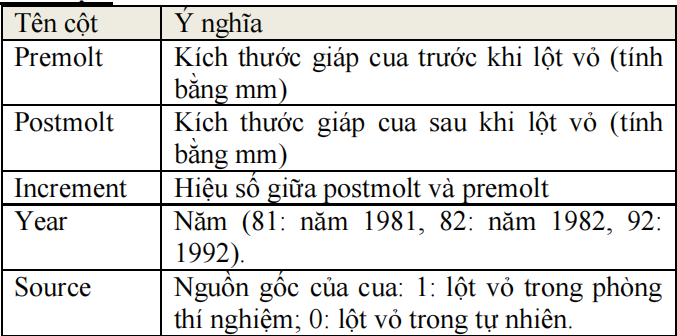


**Thực hiện các yêu cầu sau:**
1. Vẽ đồ thị scatter plot thể hiện mối tương quan giữa postmolt và premolt
2. Tính hệ số tương quan giữa postmolt và premolt
3. Xây dựng phương trình hồi quy tuyến tính
4. Kiểm định phương trình hồi quy tuyến tính
5. Dựa vào phương trình hồi quy đã xây dựng để dự đoán

In [1]:
# Khai báo các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/crabs.csv',sep = '\s+')

In [3]:
df.head()

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


**1. Vẽ đồ thị scatter plot thể hiện mối tương quan giữa postmolt và premolt**

Text(0.5, 1.0, 'Postmost vs Premolt')

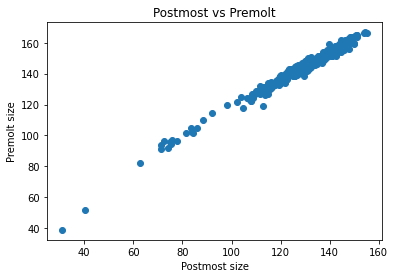

In [4]:
plt.plot(df['presz'],df['postsz'], 'o',linewidth=2);
plt.xlabel('Postmost size')
plt.ylabel('Premolt size')
plt.title('Postmost vs Premolt')

**2. Tính hệ số tương quan giữa postmolt và premolt**

In [5]:
pearsonr(df['postsz'],df['presz'])

(0.9903699282533854, 0.0)

**3. Xây dựng phương trình hồi quy tuyến tính**

In [6]:
result = smf.ols('presz~postsz', df).fit()
print('DU  BAO', result.summary())

DU  BAO                             OLS Regression Results                            
Dep. Variable:                  presz   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:42:26   Log-Likelihood:                -1040.6
No. Observations:                 472   AIC:                             2085.
Df Residuals:                     470   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2137      1.001    -25.191 

**4. Kiểm định phương trình hồi quy tuyến tính**

- Phương trình hồi quy: premost= -25.2137+1.0732*postmolt

**5.Dùng phương trình hồi quy để dự báo**

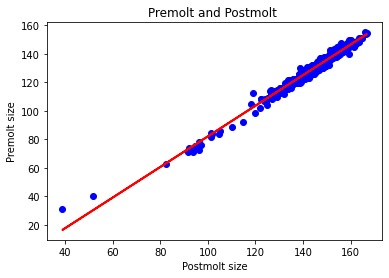

In [7]:
#y dự báo dựa vào phương trình hồi quy
sales_pred = result.predict() # dự đoán
plt.plot(df['postsz'],df['presz'],'o', color = 'b') 
plt.plot(df['postsz'],sales_pred,'r',linewidth=2) 
plt.xlabel('Postmolt size')
plt.ylabel('Premolt size')
plt.title('Premolt and Postmolt ')
plt.show()